<a href="https://colab.research.google.com/github/Randasabag/Projet-5-ML/blob/main/Copie_de_P5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Partie 1 : Librairies et Données

In [168]:
import numpy
print(numpy.__version__)

import gensim
print(gensim.__version__)

1.26.4
4.3.3


In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from wordcloud import WordCloud 
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from gensim import corpora
from gensim.models import LdaModel, Word2Vec
import gensim
from gensim import corpora
import pyLDAvis
import pyLDAvis.gensim
import pyLDAvis.gensim_models
from gensim.models.coherencemodel import CoherenceModel
import pyLDAvis.gensim as gensimvis
import gensim.downloader as api
import warnings
from collections import Counter
import joblib
from sklearn.metrics import coverage_error
from sklearn.metrics import label_ranking_average_precision_score
from sklearn.metrics import label_ranking_loss
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
import warnings
warnings.filterwarnings('ignore')
import os
import mlflow

In [216]:
df =  pd.read_csv("data_titres.csv")
df.columns
df=df.drop('Unnamed: 0', axis=1)
df.head()

,Title,Body,Tags,Id,Score,ViewCount,AnswerCount,sentence_bow,sentence_bow_lem,sentence_dl
0,How do I delete a Git branch locally and remot...,<p>Failed Attempts to Delete a Remote Branch:<...,<git><version-control><git-branch><git-push><g...,2003505,20378,11525076,41,how delete git branch locally remotely,how delete git branch locally remotely,how do i delete a git branch locally and remot...
1,Find all files containing a specific text (str...,<p>How do I find all files containing a specif...,<linux><text><grep><directory><find>,16956810,7501,11034477,56,find files containing specific text string linux,find file containing specific text string linux,find all files containing a specific text ( st...
2,"How do I force ""git pull"" to overwrite local f...",<p>How do I force an overwrite of local files ...,<git><version-control><overwrite><git-pull><gi...,1125968,9662,8559695,54,how force git pull overwrite local files,how force git pull overwrite local file,how do i force `` git pull '' to overwrite loc...
3,How do I check if a string contains a specific...,<p>Consider:</p>\n\n<pre><code>$a = 'How are y...,<php><string><substring><contains><string-matc...,4366730,2655,6713692,36,how check string contains specific word,how check string contains specific word,how do i check if a string contains a specific...
4,Renaming column names in Pandas,<p>I want to change the column labels of a Pan...,<python><pandas><replace><dataframe><rename>,11346283,2974,6485201,33,renaming column names pandas,renaming column name panda,renaming column names in pandas


In [217]:
df.shape

(50000, 10)

# Partie 2 : Méthode Supervisée

## Word2Vec

In [172]:
df = df.sample(5000)

In [173]:
## Word2Vec
model = api.load("word2vec-google-news-300")

In [174]:
def color(val):
    color = 'blue' if val > 0 else ''
    return 'background-color: %s' % color

tf = TfidfVectorizer()
feat = 'sentence_bow_lem'
tf_transform = tf.fit_transform(df[feat])
tf_feature_names = tf.get_feature_names_out()
print('Term Frequency - Inverse Document Frequency of Document')
dftf = pd.DataFrame(tf_transform.toarray(), columns = tf_feature_names) / len(tf_feature_names)
dftf.style.set_caption("Term Frequency of Document")
dftf.style.applymap(color)
dftf.head()
tokens = tf_feature_names
len(tokens)

Term Frequency - Inverse Document Frequency of Document


5403

In [175]:
nltk.download('abc')

[nltk_data] Downloading package abc to
[nltk_data]     /Users/randaalsabbagh/nltk_data...
[nltk_data]   Package abc is already up-to-date!


True

In [176]:
tokens_list = tokens.tolist()
len(tokens_list)

5403

In [177]:
tokens_list[-1]

'zxing'

In [178]:
word2vec = gensim.models.Word2Vec([tokens_list], vector_size=10000, window=5, min_count=1, workers=4)

# le dernier token doit être dans le vocabulaire du modèle 
if tokens[-1] in word2vec.wv:
    embedding1 = word2vec.wv.most_similar(tokens_list[-1]) # 'zero'

    # Sélectionner des mots supplémentaires pour former un dataset compréhensible pour le ACP 
    words = list(word2vec.wv.index_to_key)[:50]  # 50 premiers mots 

    # Chercher les vecteurs pour ces mots 
    X = [word2vec.wv[word] for word in words]

    # Convertir la liste des vecteurs en tableau NumPy 
    X = np.array(X)

print(f'Word Embeddibng using Word2Vec: \n\nMost Similar Words => {embedding1} \n\nWord Vector => {X}')
print(X.shape)

Word Embeddibng using Word2Vec: 

Most Similar Words => [('regular', 0.03445770591497421), ('clearkey', 0.03390898555517197), ('reroute', 0.03382398933172226), ('atom', 0.032213013619184494), ('wsimport', 0.0321955531835556), ('lts', 0.031915973871946335), ('offsetx', 0.03156094253063202), ('captured', 0.03129278123378754), ('recursive', 0.03097904846072197), ('cancel', 0.030621565878391266)] 

Word Vector => [[-5.2545379e-06  2.4875958e-06  5.0991435e-05 ... -6.2013519e-06
   8.3968462e-06  7.2308743e-05]
 [ 3.3523811e-05 -9.1548485e-05  4.6098496e-05 ... -3.5956051e-05
   1.7238919e-05 -3.7446091e-06]
 [-5.6720495e-05  1.4697153e-05 -1.7005568e-05 ... -4.1180308e-05
  -6.5168933e-05 -2.6942513e-05]
 ...
 [-2.8118619e-05  8.0877711e-05 -9.4053030e-05 ... -4.6490819e-05
   8.9084868e-05  8.2988001e-05]
 [ 8.0137666e-05  2.8360577e-05  4.1371015e-05 ... -8.6173764e-05
  -1.8540934e-05 -2.6157739e-05]
 [-4.3373420e-05 -6.6361172e-05  4.7555601e-05 ... -3.4602930e-05
   8.4705571e-05  6.2

### PCA


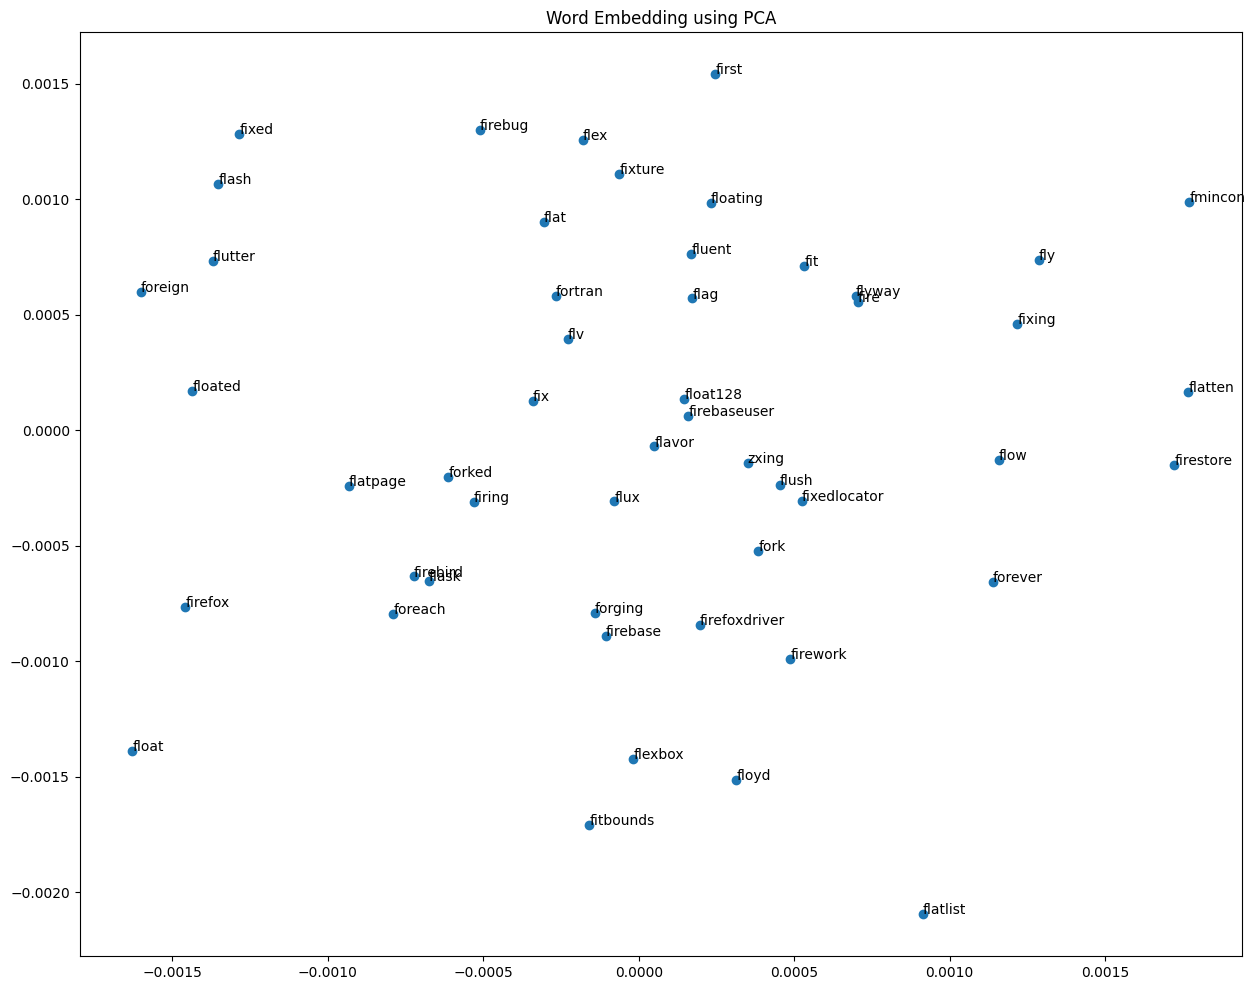

In [179]:
pca = PCA(n_components = 2)
result = pca.fit_transform(X)

plt.figure(figsize = (15, 12))
plt.title('Word Embedding using PCA')
plt.scatter(result[ : , 0], result[ : , 1])
for i, word in enumerate(words):
    plt.annotate(word, xy = (result[i, 0], result[i, 1]))
plt.show()

In [180]:
y = df.Tags
y.head()

13955           <ssl><https><openssl><redhat><self-signed>
40441    <git><intellij-idea><version-control><branch><...
43789                 <linux><assembly><x86><nasm><strlen>
18226    <java><jakarta-ee><netbeans><deployment><glass...
7604     <javascript><jquery><html><contenteditable><cu...
Name: Tags, dtype: object

In [181]:
tags = [tag[1:len(tag) - 1].split('><') for tag in df['Tags']]
len(tags)

5000

### MultiLabelBinazer

In [182]:
# Étape 1: Aplatir la liste des tags pour compter leur fréquence
all_tags = [tag for sublist in tags for tag in sublist if tag and tag.strip()]  # Filtrer les tags vides
tag_counts = Counter(all_tags)

# Étape 2: Afficher le nombre total d'étiquettes et leur fréquence
print("Fréquence des étiquettes:")
for tag, count in list(tag_counts.items()):
    print(f"{tag}: {count}")

# Définir un seuil pour le filtrage des étiquettes
threshold = 0.01 * len(tags)  # Par exemple, 1% des échantillons
print(f"\nSeuil de fréquence pour filtrer les étiquettes: {threshold}")

# Étape 3: Filtrer les étiquettes et les données simultanément
filtered_tags = []
filtered_dftf = []

for i, sublist in enumerate(tags):
    # Filtrer les étiquettes de cette sous-liste
    filtered_sublist = [tag for tag in sublist if tag_counts[tag] >= threshold]
    
    # Si la sous-liste filtrée n'est pas vide, conserver les étiquettes et les données correspondantes
    if filtered_sublist:
        filtered_tags.append(filtered_sublist)
        filtered_dftf.append(dftf.iloc[i])  # Ajouter les données correspondantes

# Convertir filtered_dftf en DataFrame
dftf = pd.DataFrame(filtered_dftf)

# Étape 4: Filtrer les listes vides
filtered_tags = [sublist for sublist in filtered_tags if sublist]

# Étape 5: Afficher les étiquettes après filtrage
print("\nÉtiquettes après filtrage :")
for sublist in filtered_tags:
    print(sublist)

# Étape 6: Initialisation du MultiLabelBinarizer
mlb = MultiLabelBinarizer()

# Conversion des labels en matrice binaire
binary_labels = mlb.fit_transform(filtered_tags)

# Affichage des classes identifiées par MultiLabelBinarizer
print("Classes (5 premières):", mlb.classes_)

# Affichage de la matrice binaire résultante
print("Matrice binaire:")
print(binary_labels)

Fréquence des étiquettes:
ssl: 38
https: 27
openssl: 14
redhat: 1
self-signed: 2
git: 54
intellij-idea: 15
version-control: 9
branch: 4
clone: 5
linux: 166
assembly: 11
x86: 5
nasm: 2
strlen: 2
java: 739
jakarta-ee: 24
netbeans: 8
deployment: 10
glassfish: 7
javascript: 644
jquery: 276
html: 326
contenteditable: 3
cursor-position: 1
python: 607
selenium: 38
google-chrome: 51
selenium-webdriver: 22
selenium-chromedriver: 8
css: 219
opacity: 3
gradient: 5
arrays: 122
types: 22
declaration: 3
strict: 1
import: 15
module: 9
python-import: 3
langchain: 1
php: 274
security: 29
passwords: 12
blowfish: 1
crypt: 1
ajax: 76
cross-domain: 6
jsonp: 4
cors: 17
pandas: 86
dataframe: 64
append: 9
series: 5
c#: 339
json: 120
comparison: 8
protocol-buffers: 5
bson: 1
gruntjs: 4
gulp: 7
bower: 2
safari: 14
flexbox: 7
mobile-safari: 8
gcc: 36
linker: 9
glibc: 2
libc: 3
wordpress: 20
jsf: 11
jsf-2: 9
jboss: 10
wildfly: 2
mojarra: 1
node.js: 160
reactjs: 115
npm: 42
dependencies: 11
package.json: 7
python-

## Entraînement du modèle

In [184]:
train_title, test_title, train_labels, test_labels = train_test_split(dftf, binary_labels, test_size=0.2, random_state=42)
print("X_train shape : {}".format(train_title.shape))
print("X_test shape : {}".format(test_title.shape))
print("y_train shape : {}".format(train_labels.shape))
print("y_test shape : {}".format(test_labels.shape))

X_train shape : (3670, 5403)
X_test shape : (918, 5403)
y_train shape : (3670, 64)
y_test shape : (918, 64)


In [227]:
def metrics_score(model, df, y_true, y_pred):
    """Compilation function of metrics specific to multi-label
    classification problems in a Pandas DataFrame.
    This dataFrame will have 1 row per metric
    and 1 column per model tested.

    Exemples de Metriques
    ----------------------------------------
    coverage_error = 3 : En moyenne, il faut inclure trois prédictions pour capturer toutes les étiquettes pertinentes pour chaque instance.
    label_ranking_average_precision_score = 0.85 : La précision moyenne des classements est de 85%. Cela signifie que la majorité des étiquettes pertinentes sont bien classées en haut.
    label_ranking_loss = 0.1 : Il y a 10% d'inversions dans les classements où les étiquettes non pertinentes sont classées avant les étiquettes pertinentes.

    Parameters
    ----------------------------------------
    model : string
        Name of the tested model
    df : DataFrame
        DataFrame to extend.
        If None : Create DataFrame.
    y_true : array
        Array of true values to test
    y_pred : array
        Array of predicted values to test
    ----------------------------------------
    """
    if(df is not None):
        df_results = df
    else:
        df_results = pd.DataFrame(index=["coverage_error", "label_ranking_average_precision_score",
                                       "label_ranking_loss"],
                               columns=[model])

    scores = []
    scores.append(coverage_error(y_true,
                                         y_pred))
    scores.append(label_ranking_average_precision_score(y_pred,
                                   y_true))
    scores.append(label_ranking_loss(y_true,
                                       y_pred))

    df_results[model] = scores

    return df_results

In [ ]:
os.environ["TOKENIZERS_PARALLELISM"] = "false"
# Ignorer les warnings spécifiques de scikit-learn
warnings.filterwarnings("ignore", message="Label not .* is present in all training examples", category=UserWarning, module="sklearn")

Results_W2V= pd.DataFrame(index=['coverage_error', 'coverage_error_optimized', 'label_ranking_average_precision_score',
                                'label_ranking_average_precision_score_optimized', 'label_ranking_loss', 'label_ranking_loss_optimized', 
                                'Training Time', 'Training Random Time',
                                'Testing Time', 'Testing Random Time'],
                         columns=['LogisticRegression', 'RandomForestClassifier', 'GradientBoostingClassifier'])

# Hyperparamètres
lr_params = {"estimator__C": [100, 10, 1.0, 0.1],
               "estimator__penalty": ["l1", "l2"],
               "estimator__dual": [False],
               "estimator__solver": ["liblinear"]}

random_forest_params = {
    "estimator__n_estimators": [50, 100, 200],
    "estimator__max_depth": [5,6,7],
    "estimator__min_samples_split": [2, 5, 10]}

gb_params = {
    'estimator__n_estimators': [100, 200, 300],
    'estimator__learning_rate': [0.01, 0.05, 0.1],
    'estimator__max_depth': [3, 4, 5]}

myrandcvs = [lr_params, random_forest_params, gb_params]

# Modèles
classifiers = {'LogisticRegression': LogisticRegression(),'RandomForestClassifier': RandomForestClassifier(),'GradientBoostingClassifier': GradientBoostingClassifier()}

mlflow.set_tracking_uri("http://127.0.0.1:5001")

# Définir une nouvelle expérience MLflow
mlflow.set_experiment("Multilabel_Classification_GradientBoosting_Experiment")

for model_name, model in classifiers.items():
    model_ovr = OneVsRestClassifier(model)
    randcv = RandomizedSearchCV(estimator = model_ovr, param_distributions=myrandcvs[0 if model_name == 'LogisticRegression'
                                                                       else 1 if model_name == 'RandomForestClassifier'
                                                                       else 2], n_iter=5, cv=3, n_jobs=-1, verbose=2, scoring='accuracy', random_state=42)
    # Démarrer une nouvelle exécution MLflow
    with mlflow.start_run(run_name=model_name):
        # Training
        start_time_fit = time.time() # en secondes
        model_ovr.fit(train_title, train_labels)
        time_fit = (time.time() - start_time_fit)

        # Random Training
        start_rdcv_time_fit = time.time()
        randcv.fit(train_title, train_labels)
        time_rdcv_fit = (time.time() - start_rdcv_time_fit)

        # Test
        start_time_predict = time.time()
        y_pred = model_ovr.predict(test_title)
        time_predict = (time.time() - start_time_predict)

        # Random Test
        start_rdcv_time_predict = time.time()
        y_rdcv_pred = randcv.predict(test_title)
        time_rdcv_predict = (time.time() - start_rdcv_time_predict)

        # Métriques
        coverage_errors = coverage_error(test_labels, y_pred)
        label_ranking_average_precision_scores = label_ranking_average_precision_score(test_labels, y_pred)
        label_ranking_losses = label_ranking_loss(test_labels, y_pred)

        # Métriques Random
        coverage_error_optimized = coverage_error(test_labels, y_rdcv_pred)
        label_ranking_average_precision_score_optimized = label_ranking_average_precision_score(test_labels, y_rdcv_pred)
        label_ranking_loss_optimized = label_ranking_loss(test_labels, y_rdcv_pred)

        # Enregistrer les hyperparamètres, les métriques et le modèle dans MLflow
        mlflow.log_params(randcv.best_params_)
        mlflow.log_metric("coverage_error", coverage_errors)
        mlflow.log_metric("coverage_error_optimized", coverage_error_optimized)
        mlflow.log_metric("label_ranking_average_precision_score", label_ranking_average_precision_scores)
        mlflow.log_metric("label_ranking_average_precision_score_optimized", label_ranking_average_precision_score_optimized)
        mlflow.log_metric("label_ranking_loss", label_ranking_losses)
        mlflow.log_metric("label_ranking_loss_optimized", label_ranking_loss_optimized)
        mlflow.log_metric("Training Time", time_fit)
        mlflow.log_metric("Training Random Time", time_rdcv_fit)
        mlflow.log_metric("Testing Time", time_predict)
        mlflow.log_metric("Testing Random Time", time_rdcv_predict)
        mlflow.sklearn.log_model(randcv.best_estimator_, "model")

        # Mise à jour du DataFrame
        Results_W2V.loc['coverage_error', model_name] = coverage_errors
        Results_W2V.loc['coverage_error_optimized', model_name] = coverage_error_optimized
        Results_W2V.loc['label_ranking_average_precision_score', model_name] = label_ranking_average_precision_scores
        Results_W2V.loc['label_ranking_average_precision_score_optimized', model_name] = label_ranking_average_precision_score_optimized
        Results_W2V.loc['label_ranking_loss', model_name] = label_ranking_losses
        Results_W2V.loc['label_ranking_loss_optimized', model_name] = label_ranking_loss_optimized
        Results_W2V.loc['Training Time', model_name] = time_fit
        Results_W2V.loc['Training Random Time', model_name] = time_rdcv_fit
        Results_W2V.loc['Testing Time', model_name] = time_predict
        Results_W2V.loc['Testing Random Time', model_name] = time_rdcv_predict

## Entraînement du modèle pour l'API

In [206]:
classifier = OneVsRestClassifier(GradientBoostingClassifier(random_state=42), n_jobs=-1) # Modèle multi-étiquettes

# Entraîner le modèle sur les données d'entraînement
classifier.fit(train_title, train_labels)

# Prédictions
pred_labels = classifier.predict(test_title)

# Inverse transform des prédictions
test_labels_pred_inversed_optimized = mlb.inverse_transform(pred_labels)
test_labels_inversed = mlb.inverse_transform(test_labels)

# Évaluer les performances avec le modèle optimisé
print("Les 10 premiers tags prédits avec le modèle optimisé - vrais tags :")
print("Prédits:", test_labels_pred_inversed_optimized[0:10])
print("Vrais:", test_labels_inversed[0:10])


df_metrics_compare_gb = metrics_score("Gradient Boosting Classifier",
                                   df=None,
                                   y_true = test_labels,
                                   y_pred = pred_labels)
df_metrics_compare_gb

Les 10 premiers tags prédits avec le modèle optimisé - vrais tags :
Prédits: [('python-3.x',), ('node.js',), ('python-3.x',), ('bash', 'shell'), (), (), ('json',), ('iphone', 'objective-c', 'xcode'), ('arrays', 'numpy', 'python'), ('python',)]
Vrais: [('javascript', 'python-3.x'), ('amazon-web-services', 'bash'), ('android', 'java', 'python-3.x'), ('bash', 'django'), ('android', 'php'), ('asp.net-mvc', 'c#'), ('objective-c', 'xml'), ('iphone', 'objective-c', 'xcode'), ('arrays', 'numpy', 'python'), ('python', 'python-2.7')]


,Gradient Boosting Classifier
coverage_error,47.839869
label_ranking_average_precision_score,0.643361
label_ranking_loss,0.585906


In [20]:
# Enregistrer le modèle
with open('classifier.joblib', 'wb') as file:
    joblib.dump(classifier, file)

with open('tfidf.joblib', 'wb') as file1:
    joblib.dump(tf, file1)

with open('mlb.joblib', 'wb') as file2:
    joblib.dump(mlb, file2)